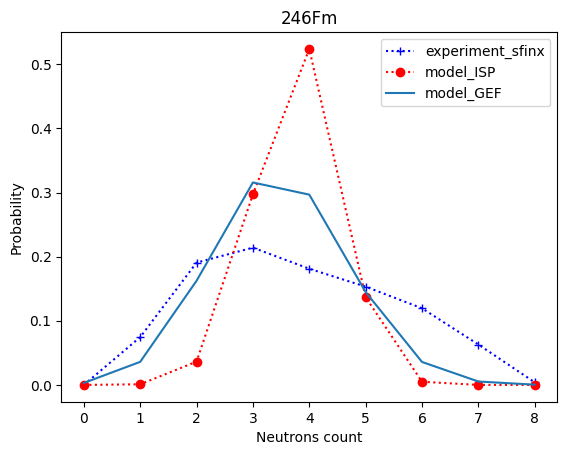

[0, 18, 46, 52, 44, 37, 29, 15, 1]
[0, 0, 9, 72, 126, 33, 1, 0, 0]
KstestResult(statistic=0.2271184115771064, pvalue=5.298434437043487e-06)
[0, 18, 46, 52, 44, 37, 29, 15, 1]
[0, 18, 46, 52, 44, 37, 29, 15, 1]
KstestResult(statistic=0.0, pvalue=1.0)
[0, 18, 46, 52, 44, 37, 29, 15, 1]
[0, 8, 21, 23, 20, 17, 13, 7, 0]
KstestResult(statistic=0.004132231404958678, pvalue=1.0)
246Fm mean experiment_sfinx:  3.7785392191
246Fm dispersion experiment_sfinx:  2.8608038302231655
246Fm mean experiment_old_barrel:  3.7836
246Fm dispersion experiment_old_barrel:  2.4337710400000017
246Fm mean model_ISP:  3.7740485201259166
246Fm dispersion model_ISP:  0.556693095637451
246Fm model_GEF:  3.4734100000000003
246Fm model_GEF:  1.4024529718999972


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

sf_total = 241
# Fm-246
experiment_sfinx = np.array([0,
                             0.0744933458,
                             0.1906650315,
                             0.2139786405,
                             0.18113788,
                             0.1532062738,
                             0.1194688463,
                             0.0630159348,
                             0.0040340473])
model_ISP = np.array([0, 
                               0.000981469247789, 
                               0.036295527115418, 
                               0.297116498126063, 
                               0.523862925878301, 
                               0.136787200106033, 
                               0.004955856204289, 
                               5.23e-07, 
                               0])
model_GEF = np.array([0.00306,
                      0.03596, 
                      0.16237, 
                      0.31563, 
                      0.29667, 
                      0.14481, 
                      0.0358, 
                      0.00531, 
                      0.00039])

x = list(range(0, 9))
plt.plot(x,experiment_sfinx,'b+:',label='experiment_sfinx')
plt.plot(x,model_ISP,'ro:',label='model_ISP')
plt.plot(x,model_GEF,label='model_GEF') # 3.47341 +/- 0.01581589 ; std 1.184252
plt.legend()
plt.title('246Fm')
plt.xlabel('Neutrons count')
plt.ylabel('Probability')
plt.show()

def mean_from(probabilities, x_power=1):
    M_x = 0
    for x, p in enumerate(probabilities):
        M_x += pow(x, x_power) * p
    return M_x

def dispersion_from(probabilities):
    M_x = mean_from(probabilities, x_power=1)
    M_x2 = mean_from(probabilities, x_power=2)
    return M_x2 - pow(M_x, 2)

def neutron_events_from(probabilities, sf=sf_total):
    counts = list(map(lambda p: round(p*sf), probabilities))
    print(counts)
    r = np.empty(0)
    for k, count in enumerate(counts):
        r = np.append(r, np.full(count, k))
    return r.astype(int)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html
models = [model_ISP, experiment_sfinx]
for model in models:
    print(ks_2samp(neutron_events_from(experiment_sfinx), neutron_events_from(model)))
    
experiment_old_barrel = np.array([0.00517,
                                  0.0723,
                                  0.149,
                                  0.204,
                                  0.222,
                                  0.195,
                                  0.125,
                                  0.0269,
                                  0])
print(ks_2samp(neutron_events_from(experiment_sfinx), neutron_events_from(model, 108)))

print("246Fm mean experiment_sfinx: ", mean_from(experiment_sfinx))
print("246Fm dispersion experiment_sfinx: ", dispersion_from(experiment_sfinx))
print("246Fm mean experiment_old_barrel: ", mean_from(experiment_old_barrel))
print("246Fm dispersion experiment_old_barrel: ", dispersion_from(experiment_old_barrel))
# print("Sigma experimental: ", math.sqrt(dispersion_from(experiment_sfinx)))
print("246Fm mean model_ISP: ", mean_from(model_ISP))
print("246Fm dispersion model_ISP: ", dispersion_from(model_ISP))
print("246Fm model_GEF: ", mean_from(model_GEF))
print("246Fm model_GEF: ", dispersion_from(model_GEF))

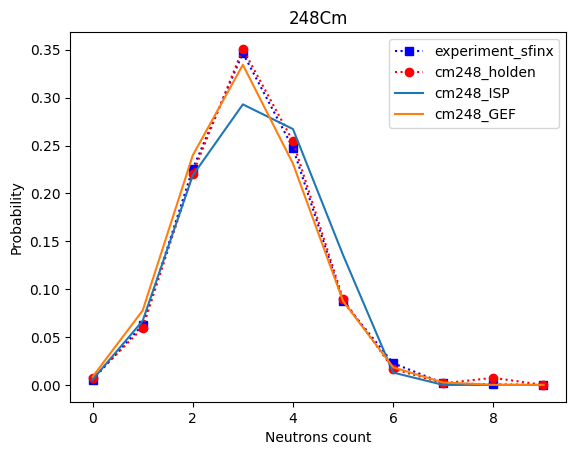

[1, 15, 54, 84, 60, 21, 5, 0, 0, 0]
[1, 16, 53, 71, 64, 33, 3, 0, 0, 0]
KstestResult(statistic=0.05660442600276625, pvalue=0.8027068115548732)
[2, 14, 53, 85, 61, 22, 4, 0, 2, 0]
[1, 16, 53, 71, 64, 33, 3, 0, 0, 0]
KstestResult(statistic=0.04868261530317777, pvalue=0.9144580777679218)
mean cm248_sfinx:  3.132799104
dispersion cm248_sfinx:  1.348862605976798
mean cm248_dushin:  3.1298999999999992
dispersion cm248_dushin:  1.336425990000004
mean cm248_holden:  3.1891899999999995
dispersion cm248_holden:  1.391897143900005
mean cm248_ISP:  3.2077326645376
dispersion cm248_ISP:  1.419006509159308
mean cm248_GEF:  3.05146
dispersion cm248_GEF:  1.4149918683999996


In [3]:
# CM-248
cm248_sfinx = np.array([0.00526,
                        0.06268,
                        0.22584,
                        0.34653,
                        0.24749,
                        0.08716,
                        0.02263,
                        0.00193,
                        4.74888E-4, 
                        0])
cm248_dushin = np.array([0.0061,
                        0.0608,
                        0.2272,
                        0.3460,
                        0.2476,
                        0.0906,
                        0.0190,
                        0.0024,
                        0.0002,
                        0.0001, 
                         0])
cm248_holden = np.array([0.00674,
                         0.05965,
                         0.22055,
                         0.3509,
                         0.25438,
                         0.08935,
                         0.01674,
                         0.00169,
                         0.0074,
                         0])
cm248_ISP = np.array([0.005531199,
                        0.066948724,
                        0.218853815,
                        0.292985388,
                        0.267202065,
                        0.135572816,
                        0.012894201,
                        1.18E-5,
                        6.72E-11,
                        0])
cm248_GEF = np.array([0.00845, 
                      0.07773, 
                      0.23981, 
                      0.33437, 
                      0.2311, 
                      0.08749, 
                      0.01839, 
                      0.00248, 
                      0.00017, 
                      1e-005])
x1 = list(range(0, 10))
plt.plot(x1,cm248_sfinx,'bs:',label='experiment_sfinx')
plt.plot(x1,cm248_holden,'ro:',label='cm248_holden')
plt.plot(x1,cm248_ISP,label='cm248_ISP')
plt.plot(x1,cm248_GEF,label='cm248_GEF') # 3.05146 +- 0.04173938 ; std 1.189534
plt.legend()
plt.title('248Cm')
plt.xlabel('Neutrons count')
plt.ylabel('Probability')
plt.show()
print(ks_2samp(neutron_events_from(cm248_sfinx), neutron_events_from(cm248_ISP)))
print(ks_2samp(neutron_events_from(cm248_holden), neutron_events_from(cm248_ISP)))

print("mean cm248_sfinx: ", mean_from(cm248_sfinx))
print("dispersion cm248_sfinx: ", dispersion_from(cm248_sfinx))
print("mean cm248_dushin: ", mean_from(cm248_dushin))
print("dispersion cm248_dushin: ", dispersion_from(cm248_dushin))
print("mean cm248_holden: ", mean_from(cm248_holden))
print("dispersion cm248_holden: ", dispersion_from(cm248_holden))
print("mean cm248_ISP: ", mean_from(cm248_ISP))
print("dispersion cm248_ISP: ", dispersion_from(cm248_ISP))
print("mean cm248_GEF: ", mean_from(cm248_GEF))
print("dispersion cm248_GEF: ", dispersion_from(cm248_GEF))

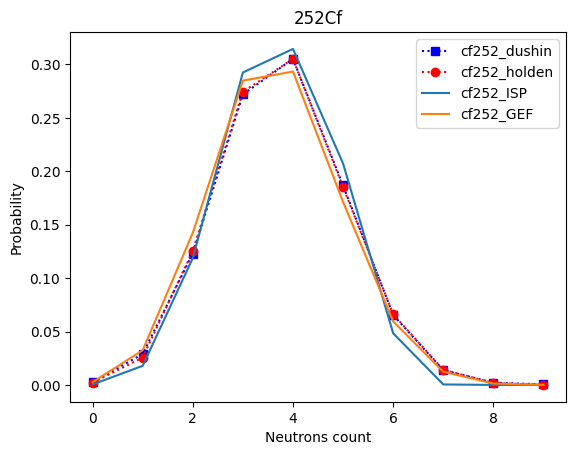

[1, 7, 30, 66, 74, 45, 16, 3, 1, 0]
[0, 4, 29, 70, 76, 50, 12, 0, 0, 0]
KstestResult(statistic=0.03251199562863924, pvalue=0.9987550070796632)
[1, 6, 30, 66, 74, 45, 16, 3, 0, 0]
[0, 4, 29, 70, 76, 50, 12, 0, 0, 0]
KstestResult(statistic=0.029045643153526972, pvalue=0.9999619383335708)
mean cf252_holden:  3.75702
dispersion cf252_holden:  1.5897207196000025
mean cf252_dushin:  3.7560000000000002
dispersion cf252_dushin:  1.621663999999999
mean cf252_ISP:  3.7198253400000003
dispersion cf252_ISP:  1.2615190278938808
mean cf252_GEF:  3.65573
dispersion cf252_GEF:  1.6117481671


In [4]:
# CF-252
cf252_dushin = np.array([0.0023,
                         0.029,
                         0.123,
                         0.2719,
                         0.3052,
                         0.1867,
                         0.0654,
                         0.0139,
                         0.0021,
                         5E-4])
cf252_holden = np.array([0.00217,
                         0.02556,
                         0.12541,
                         0.27433,
                         0.30517,
                         0.18523,
                         0.06607,
                         0.01414,
                         0.00186,
                         6E-5])
cf252_ISP = np.array([4.71678E-4,
                        0.01787,
                        0.1187,
                        0.29246,
                        0.31453,
                        0.20722,
                        0.04831,
                        4.41876E-4,
                        2.76E-7,
                        0])
cf252_GEF = np.array([0.00254, 
                      0.03244, 
                      0.14236, 
                      0.28487, 
                      0.29337, 
                      0.17129, 
                      0.05941, 
                      0.01231, 
                      0.00129, 
                      0.00012])
x2 = list(range(0, 10))
plt.plot(x2,cf252_dushin,'bs:',label='cf252_dushin')
plt.plot(x2,cf252_holden,'ro:',label='cf252_holden')
plt.plot(x2,cf252_ISP,label='cf252_ISP')
plt.plot(x2,cf252_GEF,label='cf252_GEF') # 3.65573 +/- 0.02981563 ; std 1.269546
plt.legend()
plt.title('252Cf')
plt.xlabel('Neutrons count')
plt.ylabel('Probability')
plt.show()
print(ks_2samp(neutron_events_from(cf252_dushin), neutron_events_from(cf252_ISP)))
print(ks_2samp(neutron_events_from(cf252_holden), neutron_events_from(cf252_ISP)))

print("mean cf252_holden: ", mean_from(cf252_holden))
print("dispersion cf252_holden: ", dispersion_from(cf252_holden))
print("mean cf252_dushin: ", mean_from(cf252_dushin))
print("dispersion cf252_dushin: ", dispersion_from(cf252_dushin))
print("mean cf252_ISP: ", mean_from(cf252_ISP))
print("dispersion cf252_ISP: ", dispersion_from(cf252_ISP))
print("mean cf252_GEF: ", mean_from(cf252_GEF))
print("dispersion cf252_GEF: ", dispersion_from(cf252_GEF))

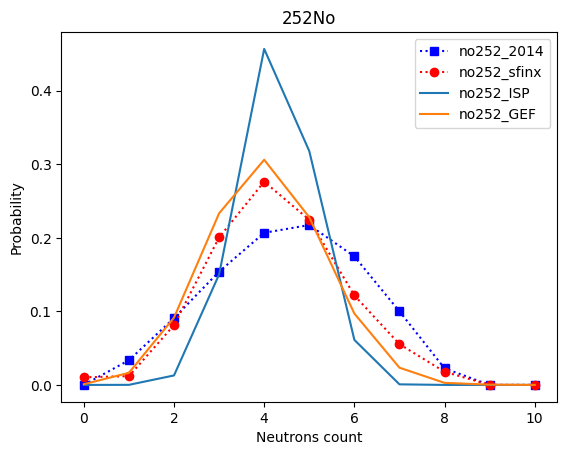

[0, 29, 77, 131, 176, 185, 149, 85, 19, 0, 0]
[0, 0, 3, 36, 110, 77, 15, 0, 0, 0, 0]
KstestResult(statistic=0.23505663339688235, pvalue=1.3303487894224685e-09)
[34, 39, 265, 654, 901, 732, 397, 181, 58, 0, 0]
[0, 0, 3, 36, 110, 77, 15, 0, 0, 0, 0]
KstestResult(statistic=0.14237543914564302, pvalue=0.00019630059504414232)
mean no252_2014:  4.520466652790333
dispersion no252_2014:  2.725318690057012
mean no252_sfinx:  4.265653685949111
dispersion no252_sfinx:  2.224198441858384
mean no252_GEF:  4.03583
dispersion no252_GEF:  1.642526211099998
mean no252_ISP:  4.266438488
dispersion no252_ISP:  0.7015992701122684


In [5]:
# No-252
no252_2014 = np.array([0,
                       0.0335936008791343,
                       0.0908182857319604,
                       0.154073316189188,
                       0.206832034646429,
                       0.217415752052365,
                       0.174756298226969,
                       0.10001385452128,
                       0.0224968577526748,
                       0,
                       0])
no252_sfinx = np.array([0.0103224900550554, 
                        0.0119468891180832, 
                        0.0812594068167688, 
                        0.200516682406316, 
                        0.276385383608438, 
                        0.224529746859013, 
                        0.121723398972806, 
                        0.0554207438952637, 
                        0.0178952582682555, 
                        0,
                        0])
no252_GEF = np.array([0.00099, 
                      0.01641, 
                      0.09151, 
                      0.23332, 
                      0.30616, 
                      0.22799, 
                      0.09702, 
                      0.02343, 
                      0.00282, 
                      0.00034, 
                      1e-005])
no252_ISP = np.array([0,
                      1.04951E-4,
                      0.012890049,
                      0.150198072,
                      0.456864808,
                      0.317940382,
                      0.061214241,
                      7.87341E-4,
                      1.56E-7,
                      0, 
                      0])
xx = list(range(0, 11))
plt.plot(xx,no252_2014,'bs:',label='no252_2014') # 4.51
plt.plot(xx,no252_sfinx,'ro:',label='no252_sfinx') # 4.25, 2.1 --- 4.27 2.2 restored
plt.plot(xx,no252_ISP,label='no252_ISP')
plt.plot(xx,no252_GEF,label='no252_GEF') # 4.03583 +/- 0.01436564 ; std 1.281611
plt.legend()
plt.title('252No')
plt.xlabel('Neutrons count')
plt.ylabel('Probability')
plt.show()
print(ks_2samp(neutron_events_from(no252_2014, 853), neutron_events_from(no252_ISP)))
print(ks_2samp(neutron_events_from(no252_sfinx, 3260), neutron_events_from(no252_ISP)))

print("mean no252_2014: ", mean_from(no252_2014))
print("dispersion no252_2014: ", dispersion_from(no252_2014))
print("mean no252_sfinx: ", mean_from(no252_sfinx))
print("dispersion no252_sfinx: ", dispersion_from(no252_sfinx))
print("mean no252_GEF: ", mean_from(no252_GEF))
print("dispersion no252_GEF: ", dispersion_from(no252_GEF))
print("mean no252_ISP: ", mean_from(no252_ISP))
print("dispersion no252_ISP: ", dispersion_from(no252_ISP))

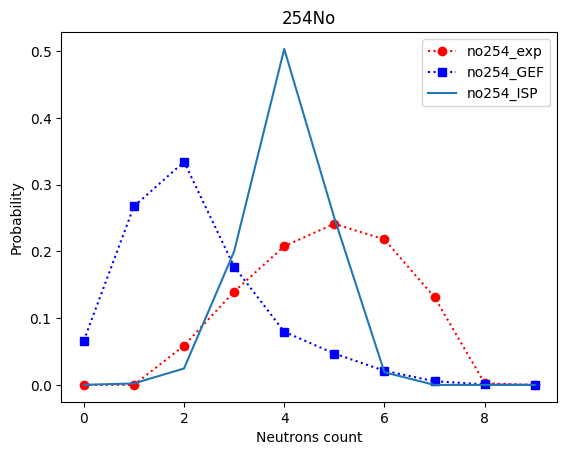

mean no254_exp:  4.824364702807101
dispersion no254_exp:  2.0329647340259918
mean no254_GEF:  2.195420000000001
dispersion no254_GEF:  1.9248310235999968
mean no254_ISP:  4.03182596381271
dispersion no254_ISP:  0.6455495444149086


In [6]:
# No-254
no254_exp  = np.array([0,
                       0, 
                       0.058900692472713435, 
                       0.13981281000044155, 
                       0.20783741870530534, 
                       0.24144177625129407, 
                       0.21800616072443435, 
                       0.13147976733043973, 
                       0.0025213745153717364, 
                       0])
no254_GEF  = np.array([0.06638,
                       0.26756,
                       0.33437,
                       0.17731,
                       0.07972,
                       0.04701,
                       0.02121,
                       0.00561,
                       0.00074,
                       9e-005])
no254_ISP   = np.array([9.57276659478619E-05,
                        0.002231780753442,
                        0.024645442467077,
                        0.200121300968046,
                        0.503510289227898,
                        0.250459647076309,
                        0.018931822915656,
                        1.29506198620731E-06,
                        0,
                        0])
xx = list(range(0, 10))
plt.plot(xx,no254_exp,'ro:',label='no254_exp')
plt.plot(xx,no254_GEF,'bs:',label='no254_GEF') # 2.19542 +/- 0.8320532 ; std 1.387383
plt.plot(xx,no254_ISP,label='no254_ISP')
plt.legend()
plt.title('254No')
plt.xlabel('Neutrons count')
plt.ylabel('Probability')
plt.show()

print("mean no254_exp: ", mean_from(no254_exp))
print("dispersion no254_exp: ", dispersion_from(no254_exp))
print("mean no254_GEF: ", mean_from(no254_GEF))
print("dispersion no254_GEF: ", dispersion_from(no254_GEF))
print("mean no254_ISP: ", mean_from(no254_ISP))
print("dispersion no254_ISP: ", dispersion_from(no254_ISP))

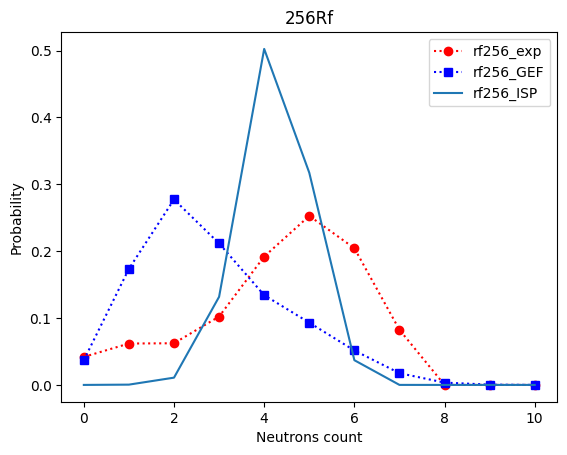

mean rf256_exp:  4.3288450746642075
dispersion rf256_exp:  3.2829224174637943
mean rf256_GEF:  2.829660000000001
dispersion rf256_GEF:  2.6308242843999974
mean rf256_ISP:  4.236563935551991
dispersion rf256_ISP:  0.5889680618327908


In [7]:
# Rf-256
rf256_exp  = np.array([0.041872043538515744, 
                       0.061914318006234724, 
                       0.06231089355542788, 
                       0.10225621626425256, 
                       0.1919791652500582, 
                       0.25280665034451166, 
                       0.20443458325542607, 
                       0.08242612978557311, 
                       0,
                       0,
                       0])
rf256_GEF  = np.array([0.03702,
                       0.17363,
                       0.27737,
                       0.21162,
                       0.13425,
                       0.09313,
                       0.05149,
                       0.01758,
                       0.00344,
                       0.00044,
                       3e-005])
rf256_ISP  = np.array([4.05181991626925E-06,
                       0.000433425998227,
                       0.010878532809558,
                       0.131780114312462,
                       0.502530027114439,
                       0.317349605051371,
                       0.036983645881652,
                       3.7584570391364E-05,
                       0,
                       0,
                       0])
rf256_ISP_dynamic = np.array([
    0.0040,
    0.0284,
    0.1101,
    0.1918,
    0.2569,
    0.1989,
    0.1794,
    0.0305,
    0,
    0,
    0
])
xx = list(range(0, 11))
plt.plot(xx,rf256_exp,'ro:',label='rf256_exp')
plt.plot(xx,rf256_GEF,'bs:',label='rf256_GEF') # 2.829660000000001 ; std 1.621982
plt.plot(xx,rf256_ISP,label='rf256_ISP')
plt.plot(xx,rf256_ISP_dynamic,label='rf256_ISP_dynamic')
plt.legend()
plt.title('256Rf')
plt.xlabel('Neutrons count')
plt.ylabel('Probability')
plt.show()

print("mean rf256_exp: ", mean_from(rf256_exp))
print("dispersion rf256_exp: ", dispersion_from(rf256_exp))
print("mean rf256_GEF: ", mean_from(rf256_GEF))
print("dispersion rf256_GEF: ", dispersion_from(rf256_GEF))
print("mean rf256_ISP: ", mean_from(rf256_ISP))
print("dispersion rf256_ISP: ", dispersion_from(rf256_ISP))
print("mean rf256_ISP_dynamic: ", mean_from(rf256_ISP_dynamic))
print("dispersion rf256_ISP_dynamic: ", dispersion_from(rf256_ISP_dynamic))

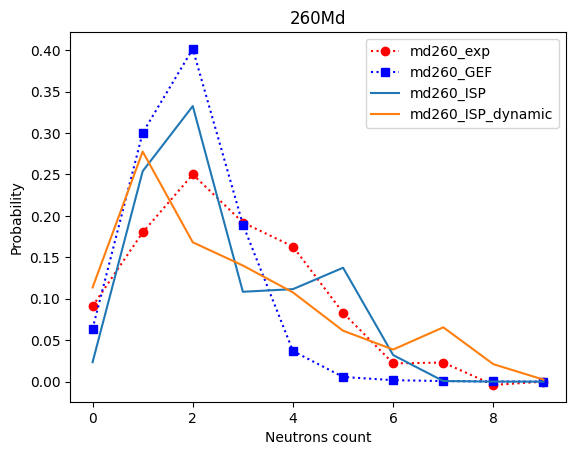

mean md260_exp:  2.584
dispersion md260_exp:  2.576944000000001
mean md260_GEF:  1.86371
dispersion md260_GEF:  0.9753550358999998
mean md260_ISP:  2.5744000000000002
dispersion md260_ISP:  2.3388646400000006
mean md260_ISP_dynamic:  2.6518
dispersion md260_ISP_dynamic:  4.576556759999998


In [10]:
# Md-260
md260_exp  = np.array([0.091,
                       0.180,
                       0.250,
                       0.192,
                       0.163,
                       0.083,
                       0.022,
                       0.023,
                       -0.004,
                       0.000])
md260_GEF  = np.array([0.06377,
                       0.30018,
                       0.40147,
                       0.18954,
                       0.03686,
                       0.00561,
                       0.00174,
                       0.00064,
                       0.00015,
                       4e-005])
md260_ISP  = np.array(
    [
        0.0234,
        0.2539,
        0.3325,
        0.1084,
        0.1116,
        0.1374,
        0.032,
        7e-4,
        0,
        0
    ]
)
md260_ISP_dynamic  = np.array(
    [
        0.1136,
        0.2776,
        0.1681,
        0.1401,
        0.1076,
        0.0614,
        0.0387,
        0.0655,
        0.0210,
        0.0024
    ]
)

xx = list(range(0, 10))
plt.plot(xx,md260_exp,'ro:',label='md260_exp')
plt.plot(xx,md260_GEF,'bs:',label='md260_GEF') # 1.86+/-0.04 ; std 0.987
plt.plot(xx,md260_ISP,label='md260_ISP')
plt.plot(xx,md260_ISP_dynamic,label='md260_ISP_dynamic')
plt.legend()
plt.title('260Md')
plt.xlabel('Neutrons count')
plt.ylabel('Probability')
plt.show()

print("mean md260_exp: ", mean_from(md260_exp))
print("dispersion md260_exp: ", dispersion_from(md260_exp))
print("mean md260_GEF: ", mean_from(md260_GEF))
print("dispersion md260_GEF: ", dispersion_from(md260_GEF))
print("mean md260_ISP: ", mean_from(md260_ISP))
print("dispersion md260_ISP: ", dispersion_from(md260_ISP))
print("mean md260_ISP_dynamic: ", mean_from(md260_ISP_dynamic))
print("dispersion md260_ISP_dynamic: ", dispersion_from(md260_ISP_dynamic))